#### Xl Juleoriansyah Nksrsb / 13317005
#### Muhamad Asa Nurrizqita Adhiem / 13317018
#### Oktoni Nur Pambudi / 13317022
#### Bernardus Rendy / 13317041

# Definisi Masalah
#### Dalam tangki dengan luas permukaan A, luas luaran a, dalam percepatan gravitasi g [Parameter A,a,g]
#### Diisi dengan flow fluida Vin (asumsi fluida incompressible) sehingga terdapat ketinggian h [Variabel Input Vin dan output h]
#### Akan memiliki luaran $V_{out}$ dengan 
$V_{out} = a \sqrt{2gh} $ 
#### Sehingga akan didapat hubungan persamaan diferensial non-linear
$ \frac {dh}{dt} = \frac {V_{in}}{A} - \frac {a}{A}\sqrt{2gh}$
<img src="./dinsis_nonlinear.png" style="width:50%;">

#### Sumber Gambar: Slide Kuliah Dinamika Sistem dan Simulasi (Eko M. Budi & Estiyanti Ekawati) System Modeling: Fluidic Systems

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def dhdt_non(h,t,Vin,A,a,g):
    return (Vin/A)-(a/A)*np.sqrt(2*g*h)

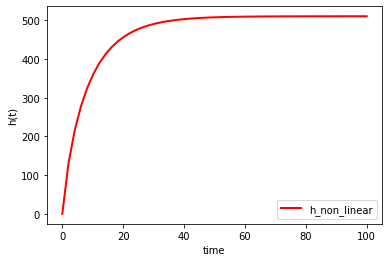

In [3]:
# initial condition
h0 = 0

# Parameter
A = 1
g = 9.8
Vin =100
a = 1

# time points
t = np.linspace(0,100)

# solve ODEs
hnon = odeint(dhdt_non,h0,t,args=(Vin,A,a,g))

# plot results
plt.plot(t,hnon,'r-',linewidth=2,label='h_non_linear')
plt.xlabel('time')
plt.ylabel('h(t)')
plt.legend()
plt.show()

# Alternatif Penyelesaian: Linearisasi
#### Dalam sebuah persamaan diferensial non-linear, sulit ditentukan fungsi transfer (karena h dalam akar sehingga tidak dapat dikeluarkan dengan mudah) dan penyelesaian analitik tanpa menggunakan numerik sehingga dibentuk suatu metode bernama linearisasi. Linearisasi juga mengimplikasi operasi matematika yang jauh lebih mudah
#### Linearisasi menggunakan ekspansi taylor orde 1 untuk mengubah persamaan diferensial $ \frac {dh(t)}{dt} = \frac {q_i(t)}{A} - \frac {a}{A}\sqrt{2gh(t)}$ menjadi linear
<img src="./dinsis_linear1.png" style="width:50%">

#### Sumber Gambar: Slide Kuliah Dinamika Sistem dan Simulasi (Eko M. Budi & Estiyanti Ekawati) System Modeling: Fluidic Systems

#### Menghasilkan (dengan catatan qi adalah Vin)
# $ \frac {dh}{dt} - \frac {d\bar h}{dt} = \frac {V_{in}- \bar {V_{in}}}{A} - (\frac {a \sqrt {2g}}{2A \sqrt {\bar h}})(h - \bar h) $

#### Setelah linearisasi, dihasilkan persamaan diferensial linear yang dapat beroperasi dekat $ \bar h $

#### Secara sederhana, ditulis 
# $ \frac {d\hat h}{dt} = \frac {\hat {V_{in}}}{A} - \frac{\hat h}{R} $

#### Dimana 
### $ \hat h = h-\bar h $
### $ \hat {V_{in}} = V_{in} - \bar {V_{in}} $
### $ R=\frac {A \sqrt {2 \bar {h}}}{a \sqrt{g}} $

#### Sehingga harus dipilih kondisi dimana $ \bar h $ sesuai untuk daerah operasi persamaan
#### Terlihat bahwa persamaan digunakan pada 0 hingga steady state, saat steady state
# $ \frac {dh}{dt} = 0 $
#### Berdasarkan persamaan
# $ \frac {dh}{dt} = \frac {V_{in}}{A} - \frac {a}{A}\sqrt{2gh}$
# $ 0 = V_{in} - a \sqrt{2g\bar {h}} $
# $ \bar {h} = \frac {V_{in}^2}{2ga^2} $
#### Juga harus dipilih kondisi dimana $ \bar V_{in} $ sesuai untuk daerah operasi persamaan
#### Terlihat bahwa jika input merupakan fungsi step, 
# $ \bar V_{in} = V_{in} $
#### Karena $ V_{in} $ konstan, maka pada kondisi akhir dimana $ \bar V_{in} $ beroperasi, juga tetap sama dengan $ V_{in} $

#### Menggunakan persamaan yang sebelumnya telah diturunkan
# $ \frac {d\hat h}{dt} = \frac {\hat {V_{in}}}{A} - \frac{\hat h}{R} $
#### Dimana 
### $ \hat h = h-\bar h $
### $ \hat {V_{in}} = V_{in} - \bar {V_{in}} $
### $ R=\frac {A \sqrt {2 \bar {h}}}{a \sqrt{g}} $

In [4]:
def dhhatdt_lin(hhat,t,Vinhat,A,a,g,R):
    return (Vinhat/A)-(hhat/R)

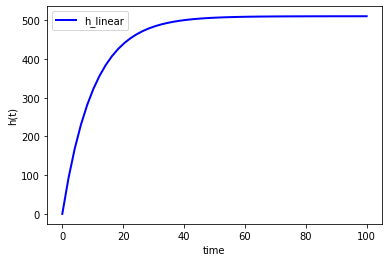

In [5]:
# Initial condition
h0 = 0

# Input
Vin=100

# Parameter
A = 1
g = 9.8
a = 1
hbar = Vin**2/(2*g*a**2)
R=(A*np.sqrt(2*hbar))/(a*np.sqrt(g))
hhat0 = h0-hbar 
Vinbar= Vin
Vinhat= Vin-Vinbar

# time points
t = np.linspace(0,100)

# solve ODEs, karena hasil ODE yang didapat adalah untuk hhat, maka harus dilakukan penambahan hbar karena h = hhat+hbar
hlin = odeint(dhhatdt_lin,hhat0,t,args=(Vinhat,A,a,g,R))
hlin = hlin+hbar
# plot results
plt.plot(t,hlin,'b-',linewidth=2,label='h_linear')
plt.xlabel('time')
plt.ylabel('h(t)')
plt.legend()
plt.show()

# Perbandingan Non-linear dan Linearisasi

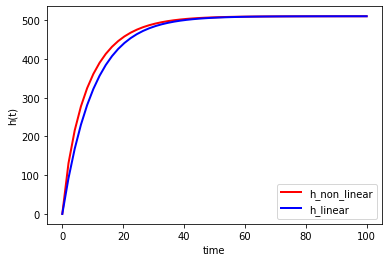

In [6]:
plt.plot(t,hnon,'r-',linewidth=2,label='h_non_linear')
plt.plot(t,hlin,'b-',linewidth=2,label='h_linear')
plt.xlabel('time')
plt.ylabel('h(t)')
plt.legend()
plt.show()

#### Terlihat perbedaan respon sistem ketika dilakukan aproksimasi linearisasi terhadap dhdt
#### Walaupun terjadi perbedaan, perbedaan tersebut kurang signifikan pada sistem ini dengan Sum Squared Error sebesar:

In [7]:
err=hnon-hlin

In [8]:
err=err*err

In [9]:
sum(err)

array([13217.29354308])

# Interface Parameter 

In [10]:
from ipywidgets import interact,fixed,widgets
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed,widgets,Button,Layout

def dhhatdt_lin(hhat,t,Vinhat,A,a,g,R):
    return (Vinhat/A)-(hhat/R)
def dhdt_non(h,t,Vin,A,a,g):
    return (Vin/A)-(a/A)*np.sqrt(2*g*h)
g = 9.8

range_A = widgets.FloatSlider(
    value=2.,
    min=1.,
    max=10.0,
    step=0.1,
    description='Luas Alas Tangki ($dm^2$):',
    layout=Layout(width='80%', height='50px'),
    style={'description_width': '200px'},
    readout_format='.1f',
)

range_a = widgets.FloatSlider(
    value=2.,
    min=0.1, max=+3., step=0.1,
    description='Luas Pipa ($dm^2$) :',
    layout=Layout(width='80%', height='50px'),
    style={'description_width': '200px'},
    readout_format='.1f',
)

range_Vin = widgets.FloatSlider(
    value= 2.,
    min=0.1,
    max=100.0,
    step=0.1,
    description='Debit Fluida Masuk ($dm^2 / s$)',
    layout=Layout(width='80%', height='50px'),
    style={'description_width': '200px'},
    readout_format='.1f',
)

range_h0 = widgets.FloatSlider(
    value= 2.,
    min=0.,
    max=500.0,
    step=0.1,
    description='Ketinggian Mula-Mula ($dm$):',
    layout=Layout(width='80%', height='50px'),
    style={'description_width': '200px'},
    readout_format='.1f',
)

range_amplitude = widgets.FloatSlider(
    value= 2.,
    min=0.,
    max=100.0,
    step=0.1,
    description='Amplituda Gangguan Sinusoidal:',
    layout=Layout(width='80%', height='50px'),
    style={'description_width': '200px'},
    readout_format='.1f',
)

time_slider = widgets.IntSlider(
    min=100, max=1000, step=1, value=100,
    description='Waktu Maksimum ($s$):',
    layout=Layout(width='80%', height='50px'),
    style={'description_width': '200px'},
    readout_format='.1f',
)

max_err_button = widgets.Button(
    description='Error Maksimum',
)

max_err_sin_button = widgets.Button(
    description='Error Maksimum Sinusoidal',
)

min_err_button = widgets.Button(
    description='Error Minimum',
)

tab1 = widgets.VBox(children=[range_A,range_a,range_Vin,range_h0,time_slider,max_err_button,min_err_button])
tab2 = widgets.VBox(children=[range_A,range_a,range_Vin,range_h0,range_amplitude,time_slider,max_err_sin_button,min_err_button])
tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'Step')
tab.set_title(1, 'GangguanSinusoidal')

A = range_A.value
a = range_a.value
Vin = range_Vin.value
h0 = range_h0.value 
tmax = time_slider.value
amp = range_amplitude.value

#Max error untuk step
def max_err_set(b=None):
    range_A.value=10.0
    range_a.value=0.1
    range_Vin.value=100
    range_h0.value=0
    time_slider.value=1000

@max_err_button.on_click
def maximum_err_set(b):
    max_err_set()
    
#Max error untuk sinusoidal    
def max_err_sin_set(b=None):
    range_A.value=10.0
    range_a.value=2.9
    range_Vin.value=100
    range_h0.value=0
    time_slider.value=150
    range_amplitude.value=100

@max_err_sin_button.on_click
def maximum_err_sin_set(b):
    max_err_sin_set()

#Min error untuk step dan sinusoidal
def min_err_set(b=None):
    range_A.value=1.0
    range_a.value=2.9
    range_Vin.value=100
    range_h0.value=50
    time_slider.value=100
    range_amplitude.value=0

@min_err_button.on_click
def minimum_err_set(b):
    min_err_set()

def plot3(A,a,Vin,h0,amp,tmax):
    t = np.linspace(50,tmax,1000)
    f, ax = plt.subplots(1, 1, figsize=(8, 6))
    if tab.selected_index == 1 :
        def dhdt_non_sin(h,t,Vin,A,a,g,amp):
            return ((Vin+abs(amp*np.sin(np.pi*t)))/A)-(a/A)*np.sqrt(2*g*h)
        def dhhatdt_lin_sin(hhat,t,Vin,A,a,g,amp):
            V=Vin+abs(amp*np.sin(np.pi*t))
            R=(A*np.sqrt(2*hbar))/(a*np.sqrt(g))
            Vinbar=Vin
            Vinhat=V-Vinbar
            return ((Vinhat/A)-(hhat/R))
        hbar = Vin**2/(2*g*a**2)
        hhat0 = h0-hbar
        hlin = odeint(dhhatdt_lin_sin,hhat0,t,args=(Vin,A,a,g,amp))
        hlin = hlin+hbar
        hnon = odeint(dhdt_non_sin,h0,t,args=(Vin,A,a,g,amp))
        ax.plot(t, hlin , color = 'blue', label ='linier')
        ax.plot(t, hnon , color = 'red', label ='non-linier')
        ax.title.set_text('Input Step dengan Gangguan Sinusoidal')
        ax.legend()
        
    if tab.selected_index == 0 :
        hbar = Vin**2/(2*g*a**2)
        R=(A*np.sqrt(2*hbar))/(a*np.sqrt(g))
        hhat0 = h0-hbar 
        Vinbar= Vin
        Vinhat= Vin-Vinbar
        hlin = odeint(dhhatdt_lin,hhat0,t,args=(Vinhat,A,a,g,R))
        hlin = hlin+hbar
        hnon = odeint(dhdt_non,h0,t,args=(Vin,A,a,g))
        ax.plot(t, hlin , color = 'blue' , label ='linier')
        ax.plot(t, hnon , color = 'red', label='non-linier')
        ax.title.set_text('Input Step')
        ax.legend()

In [11]:
ui = tab
out = widgets.interactive_output(plot3,{'A':range_A,'a':range_a,'Vin':range_Vin,'h0':range_h0,'amp':range_amplitude,'tmax':time_slider})

In [12]:
display(ui,out)

Output()

# Pembahasan
Dari grafik di atas: kurva biru (linear) dan merah (non linear), dapat dilihat bahwa kurva merah dan biru tersebut terkadang sama atau hampir berhimpit yang berarti error antara linear dan non-linear kecil, namun terkadang juga tidak berhimpit dan error antara linear dan non-linear menjadi besar. Dapat digunakan interaksi untuk meninjau efek perubahan parameter terhadap model respon sistem yang dibentuk dengan persamaan non-linear dan linear. Untuk dapat melihat perbedaan respon persamaan linar dan persamaan nonlinear serta menentukan keterbatasan persamaan hasil linearisasi, kita akan membuat error tersebut agar menjadi besar. Untuk error maksimum atau minimum dapat digunakan tombol "error maksimum" dan "error minimum". Adapun cara yang dilakukan adalah: 

#### 1) Memperkecil ketinggian awal (h0) dari fluida di tabung, sehingga rentang h0 dan hfinal semakin besar
Hal ini akan menyebabkan h dan hbar memiliki perbedaan nilai yang besar saat proses transien. Ketika rentang h0 dan hfinal membesar, pada saat respon belum steady, h dan hbar akan semakin menjauh karena nilai hbar yang diambil adalah saat keadaan steady.

#### 2) Meningkatkan luas alas tabung (A)

Untuk nilai A, semakin besar A, maka akan semakin lama keadaan steady tercapai. Maka semakin lama proses h menuju hbar pada steady state, sehingga error semakin besar.

#### 3) Mengecilkan luas pipa luaran (a) [saat respon sisem sedang meningkat]

#### 4) Memperbesar luas pipa luaran (a) [saat respon sistem sedang menurun]

Kemudian untuk a, yang merupakan variabel penentu banyaknya fluida yang keluar dari tangki menentukan apakah respon tersebut menurun atau meningkat. Di faktor 2, 3, dan 4 ini kita juga mengetahui bahwa error akan terjadi saat keadaan transien akibat hbar diasumsikan saat keadaan steady. Saat respon sistem meningkat, jika a semakin kecil, perubahan 
## $ \frac{dh}{dt} - \frac{\bar{dh}}{dt} $ 
semakin besar sehingga error semakin besar pada saat transien. Berlaku sebaliknya saat respon sistem sedang menurun.

#### 5) Vin meningkat (saat respon sedang meningkat)

#### 6) Vin menurun (saat respon sedang menurun)
Dari faktor 5 dan 6 dapat dilihat bahwa saat kita meningkatkan nilai Vin, kurva biru (linear) akan semakin memperlambat keadaan steady (kurva semakin ke kanan) yang berarti error dari linearisasi semakin besar. Hal ini berhubungan dengan asumsi hbar diambil saat keadaan steady.

#### 7) Amplitudo sinusoidal yang meningkat
Faktor 7 menjelaskan hubungan Vinbar dan Vin harus berbeda nilai sekecil mungkin dan harus sesuai dengan rentang kerja sistem.